Iniciando simulação da física para: Cenário 3: Turbulência Moderada...
Simulação da física concluída.
Visualizando [Gráfico 1]: Simulação da Física Pura...


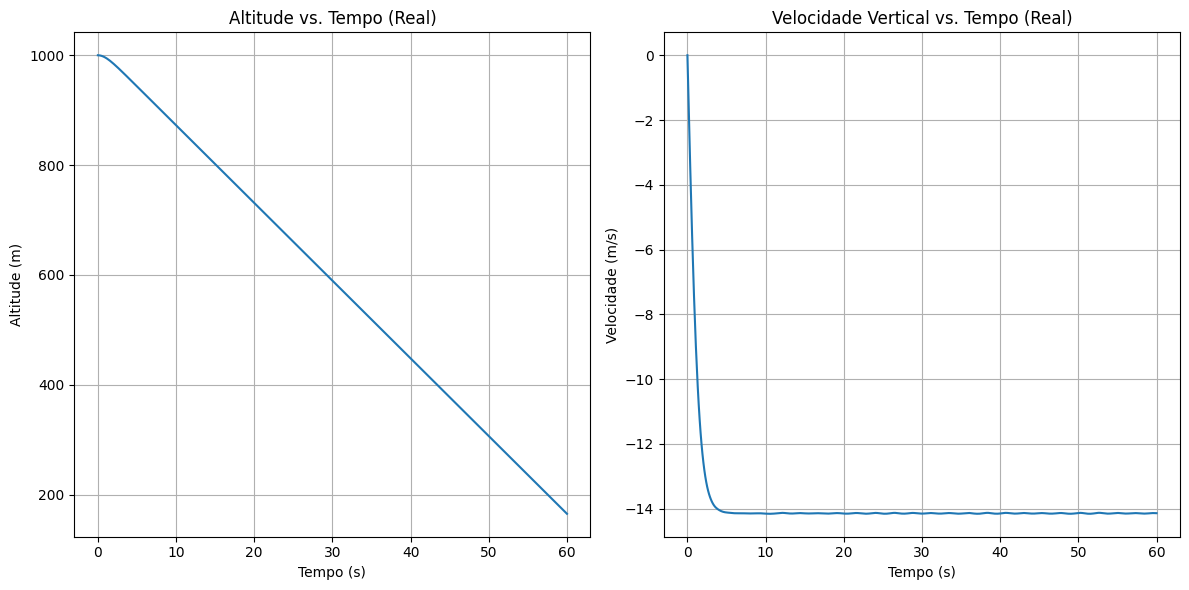

Iniciando simulação dos sensores...
Aplicando filtro de média móvel...
Simulando Pitch para: Cenário 3: Turbulência Moderada...
Simulação do sensor de Pitch concluída.
Simulação dos sensores concluída.
Visualizando [Gráfico Adicional]: Sensor Altitude GNSS (Bruto)...


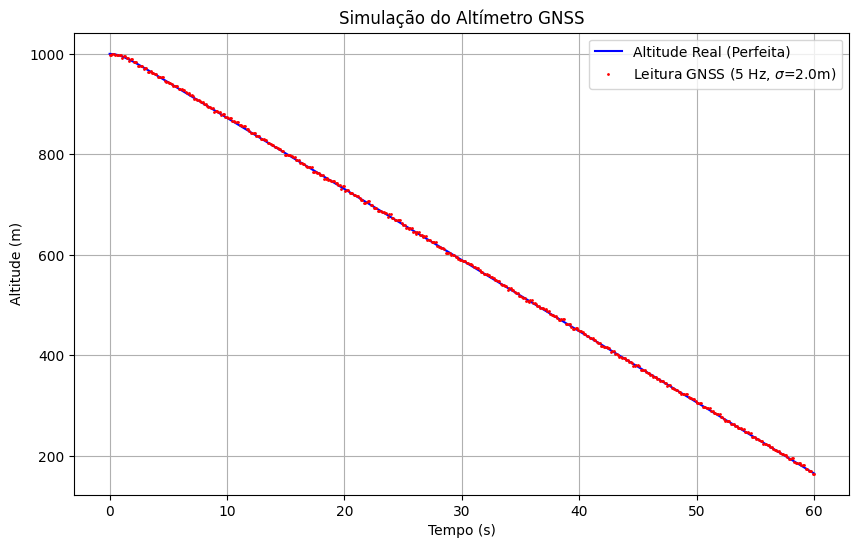

Visualizando [Gráfico Adicional]: Sensor Aceleração IMU (Bruto)...


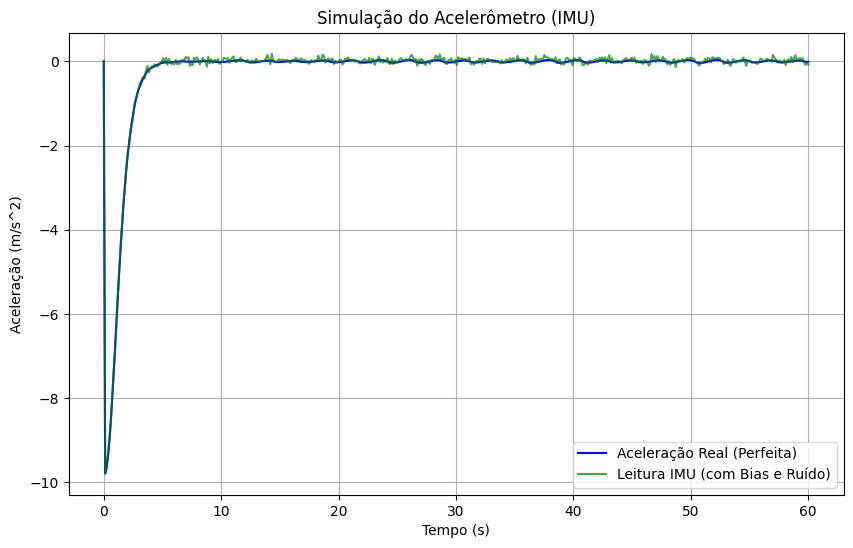

Visualizando [Gráfico 3]: Resultado do Filtro (Média Móvel)...


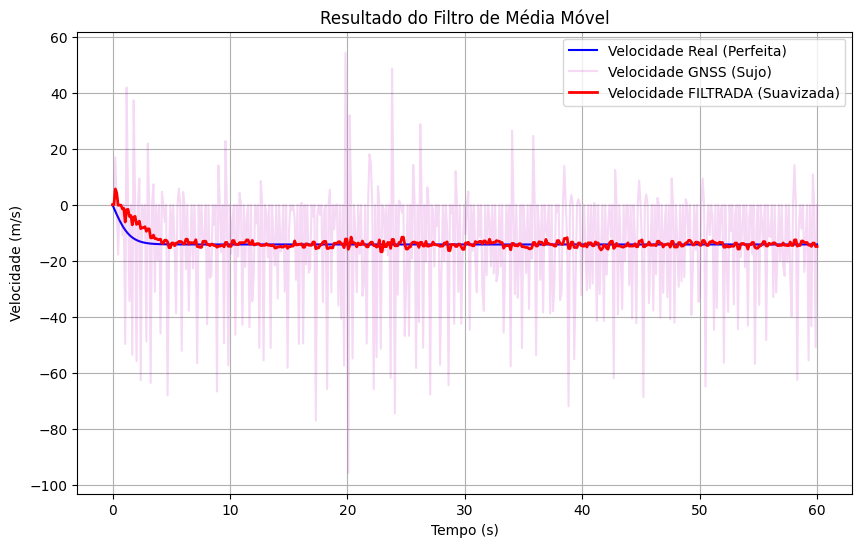

Calculando severidade (PID)...
Criando sistema de Lógica Fuzzy...
Definindo Base de Regras Fuzzy...
Regras criadas.
Montando o sistema de controle Fuzzy...
Sistema Fuzzy pronto.
Processando dados com a Lógica Fuzzy...
Processamento Fuzzy e Análise de Persistência concluídos.
Visualizando [Gráfico 4]: Decisão Final do Sistema Fuzzy...


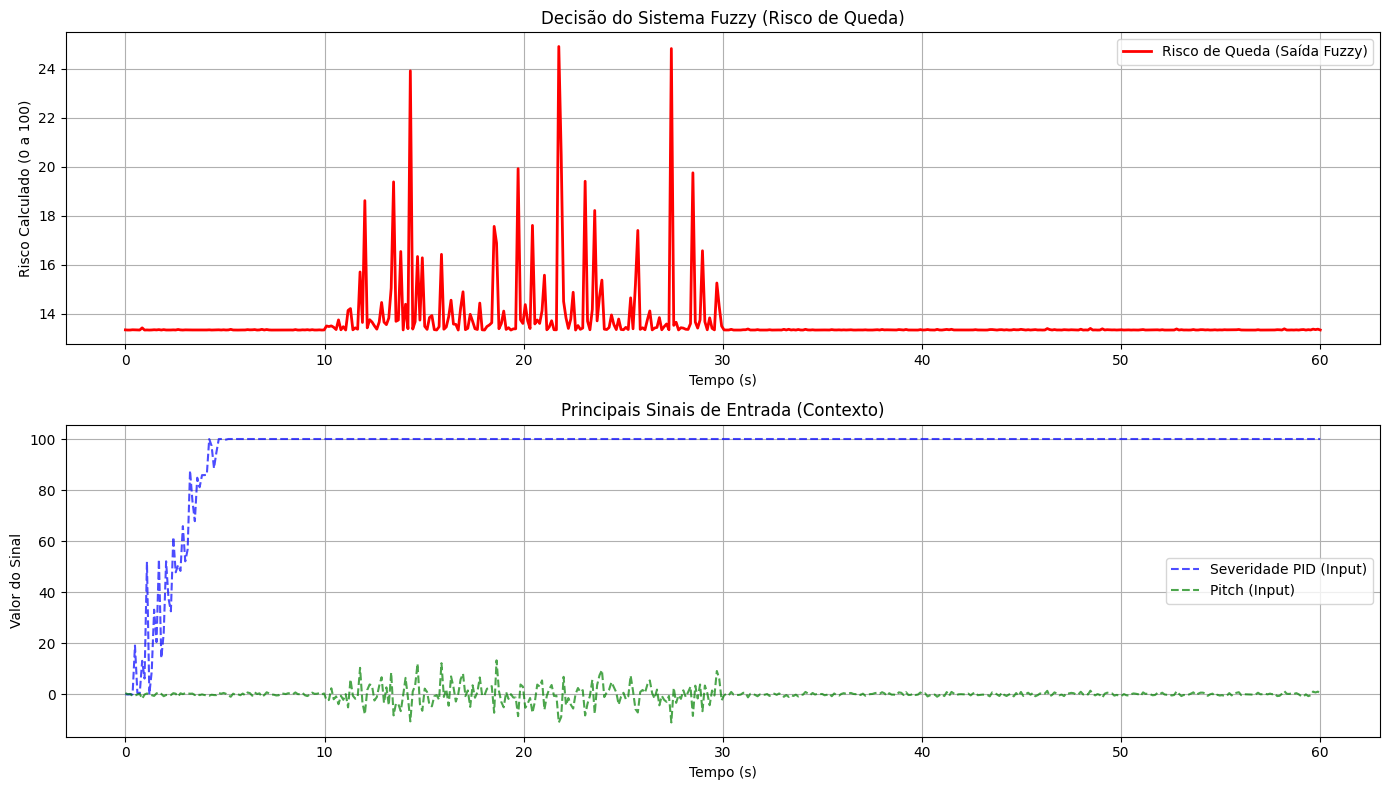


--- Análise da Tomada de Decisão (Item 3.3.2) ---

Sistema permaneceu estável. Paraquedas não foi acionado.
O risco máximo atingido foi: 24.90

--- Simulação Completa Concluída (Cenário 3: Turbulência Moderada) ---


In [1]:
# 📄 main.py
# O "cérebro" principal que orquestra toda a simulação.

# 1. Importar os módulos que criamos
import parametros as p
import simulacao_fisica as fisica
import simulacao_sensores as sensores
import logica_decisao as cerebro
import visualizacao as plots

# 2. Executar a Simulação da Física
(tempo, alt_real, vel_real, acel_real) = fisica.executar_simulacao(p)

# Plotar Gráfico 1 (O Problema)
plots.plotar_fisica_base(tempo, alt_real, vel_real)

# 3. Executar a Simulação dos Sensores
dados_sensores = sensores.simular_sensores_e_filtros(
    p, tempo, alt_real, vel_real, acel_real
)

# --- NOVAS CHAMADAS DE PLOTAGEM ---
# Plotar Gráfico da Altitude GNSS (Bruto)
plots.plotar_altitude_gnss(tempo, alt_real, dados_sensores['altitude_gnss'], p)

# Plotar Gráfico da Aceleração IMU (Bruto)
plots.plotar_aceleracao_imu(tempo, acel_real, dados_sensores['aceleracao_imu'])
# --- FIM DAS NOVAS CHAMADAS ---

# Plotar Gráfico 2 (A Justificativa)
#plots.plotar_justificativa_filtro(tempo, vel_real, dados_sensores['velocidade_estimada_gnss'])

# Plotar Gráfico 3 (A Solução)
plots.plotar_solucao_filtro(
    tempo, vel_real, 
    dados_sensores['velocidade_estimada_gnss'], 
    dados_sensores['velocidade_filtrada_gnss']
)

# 4. Executar a Lógica de Decisão (PID e Fuzzy)
# A. Calcular Severidade (PID)
severidade_pid, dt_constante = cerebro.calcular_severidade_pid(
    p, tempo, dados_sensores['velocidade_filtrada_gnss']
)

# B. Calcular Risco (Fuzzy)
risco_final, pitch_negativo_persistente = cerebro.criar_e_calcular_risco_fuzzy(
    p, tempo, dados_sensores, severidade_pid, dt_constante
)

# 5. Visualizar o Resultado Principal
# Plotar Gráfico 4 (A Decisão)
plots.plotar_decisao_final(
    tempo, 
    risco_final, 
    severidade_pid, 
    dados_sensores['pitch_sensor_giro']
)

# 6. Analisar o Disparo
cerebro.analisar_disparo(p, tempo, risco_final, pitch_negativo_persistente)

print(f"\n--- Simulação Completa Concluída ({p.cenario_nome}) ---")